In [62]:
"""Dependencies"""

import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import itertools
from termcolor import colored

In [29]:
"""Store the list of organizations in the order '16-'20, '17-'20, '18-'20, '19-'20"""

# store the organization names for the particular year range in the list
ar = [[] for x in range(4)]

# append organization names to the list 
for k in range(4):
    for i in range(2016+k, 2021):
        URL = 'https://summerofcode.withgoogle.com/archive/{}/organizations/'.format(i)
        page = requests.get(URL)
        soup = BeautifulSoup(page.content, 'html.parser')
        content = soup.find_all("li", class_="organization-card__container")
        for j in content:
            ar[k].append(j['aria-label'])

In [45]:
"""Store the count of organization names in the inner dictionary elements of the 
`org_count` list based on the year range"""

# list of dictionaries
org_count = [{} for x in range(4)]

# count the word frequencies
for k in range(4):
    for i in ar[k]:
        if i not in org_count[k]:
            org_count[k][i] = 1
        else:
            org_count[k][i] += 1

In [53]:
"""Display 50 values from first dictionary element of org_count"""

out = dict(itertools.islice(org_count[0].items(), 50))
print(out)

{'52°North Initiative for Geospatial Open Source Software GmbH': 3, 'aimacode': 4, "AOSSIE - The Australian National University's Open-Source Software Innovation and Education": 1, 'Apache Software Foundation': 3, 'ArchC': 1, 'ASCEND': 1, 'BeagleBoard.org': 3, 'Beam Community': 3, 'Berkman Center for Internet and Society': 1, 'BioJS': 1, 'Biomedical Informatics, Emory University': 2, 'Blender Foundation': 5, 'Boston University / XIA': 3, 'BRL-CAD': 5, 'BuildmLearn': 1, 'Canadian Centre for Computational Genomics (C3G) - Montreal node': 1, 'Catrobat': 5, 'cBioPortal for Cancer Genomics': 3, 'CCExtractor Development': 5, 'Celluloid': 1, 'Ceph': 2, 'CERN SFT': 1, 'Chapel': 4, 'CiviCRM': 3, 'Classical Language Toolkit': 3, 'CloudCV': 5, 'Computational Biology @ University of Nebraska-Lincoln': 4, 'Computational Science and Engineering at TU Wien': 1, 'Copyleft Games': 2, 'coreboot': 3, 'CVXPY': 1, 'D Foundation': 1, 'dbpediaspotlight': 1, 'Debian Project': 2, 'Discourse': 2, 'Distributed a

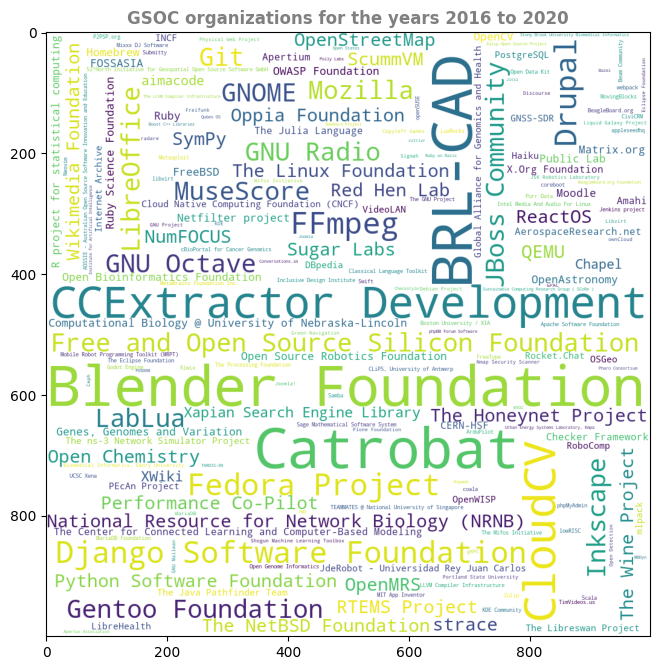

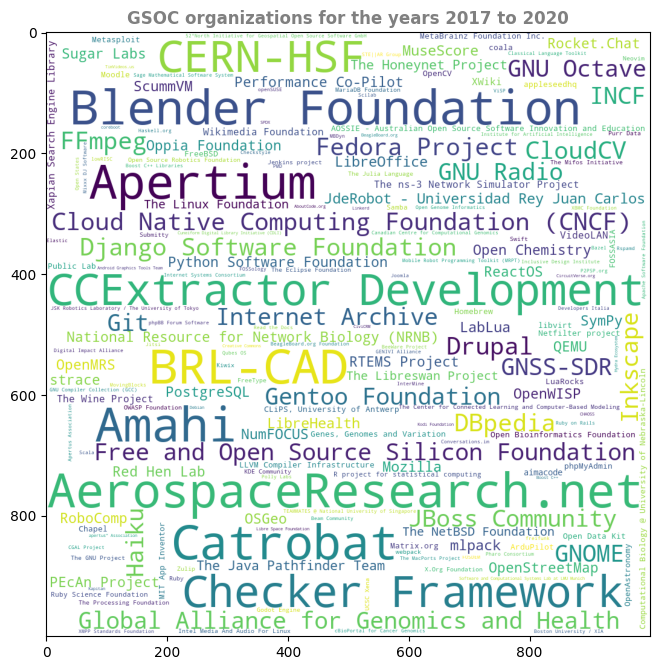

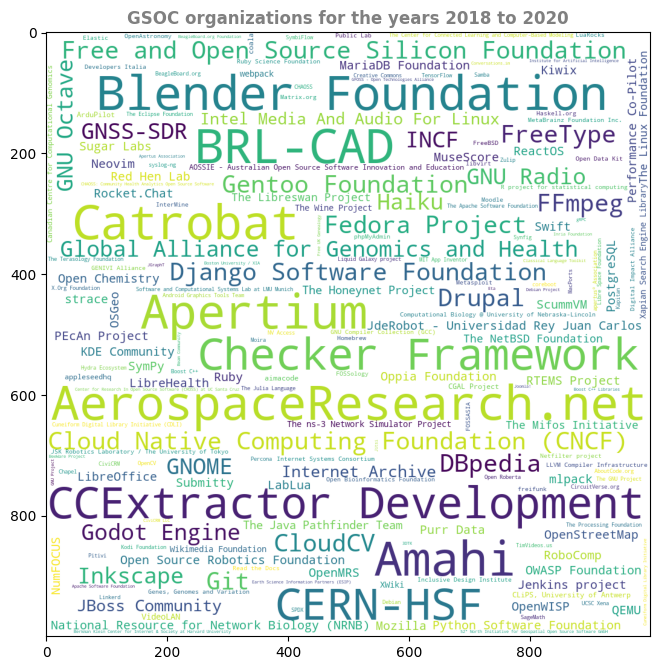

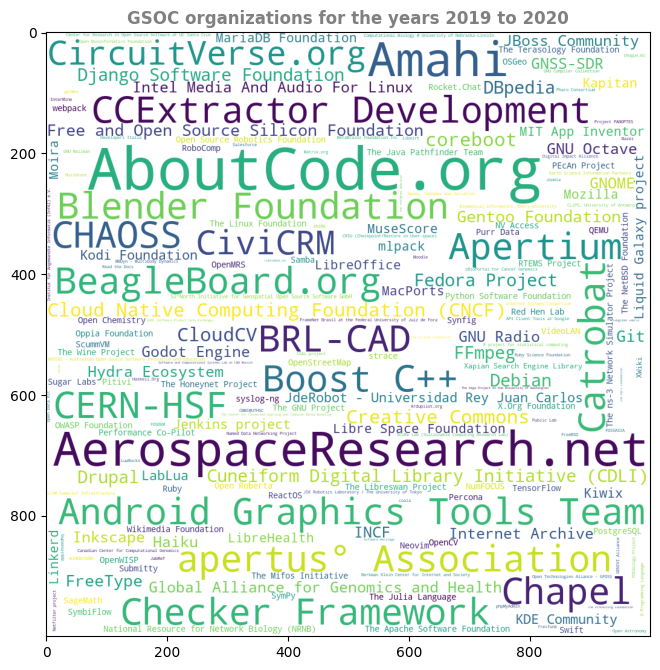

In [75]:
"""Display the wordcloud associated with each dictionary element within `org_count`"""

for i in range(4):
    wordcloud = WordCloud(background_color="white",width=1000,height=1000,relative_scaling=0.5).generate_from_frequencies(org_count[i])
    plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title("GSOC organizations for the years {} to {}".format(2016+i,2020),fontweight='bold',color='grey')
    plt.imshow(wordcloud)